In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [4]:
from google.colab import files
uploaded = files.upload()

In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))


In [101]:
df.describe()


,deaths
count,7.000000
mean,3.000000
std,5.291503
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [8]:
# Display the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

# Show column names and data types
print("Column Names and Data Types:")
print(df.dtypes)

# Display basic summary statistics
summary_statistics = df.describe()
print("\nSummary Statistics:")
print(summary_statistics)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Number of Rows: 11124
Number of Columns: 16
Column Names and Data Types:
name                             object
date_of_event                    object
age                             float64
citizenship                      object
event_location                   object
event_location_district          object
event_location_region            object
date_of_death                    object
gender                           object
took_part_in_the_hostilities     object
place_of_residence               object
place_of_residence_district      object
type_of_injury                   object
ammunition                       object
killed_by                        object
notes                            object
dtype: object

Summary Statistics:
                age
count  10995.000000
mean      26.745703
std       13.780548
min        1.000000
25%       19.000000
50%       23.000000
75%       31.000000
max      112.000000

Missing Values:
name                               0
date_of_event     

In [ ]:
# data cleaning start

In [49]:
print(f'size of set before delete duplicates: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'duplicates deleted, {df.shape} left')

size of set before delete duplicates: (11117, 17)
duplicates deleted, (11117, 17) left


In [16]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

name                               0
date_of_event                      0
age                              122
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            14
took_part_in_the_hostilities    1430
place_of_residence                61
place_of_residence_district       61
type_of_injury                   290
ammunition                      5246
killed_by                          0
notes                            277
dtype: int64


In [50]:
# quantity of women and man
w_m=df.groupby('gender').gender.count().sort_values(ascending=False).index[0]
# imputing missing values in gender column with the most frequent value
df.gender.fillna(w_m, inplace=True)

In [19]:
mean_man = df[df['gender'] == 'M']['age'].mean()
print("Mean age of males:", mean_man)

mean_woman = df[df['gender'] == 'F']['age'].mean()
print("Mean age of females:", mean_woman)

# Imputing missing values in age column with the each mean value
df.loc[df['gender'] == 'M', 'age'] = df.loc[df['gender'] == 'M', 'age'].fillna(mean_man)
df.loc[df['gender'] == 'F', 'age'] = df.loc[df['gender'] == 'F', 'age'].fillna(mean_woman)

Mean age of males: 26.24664097489845
Mean age of females: 30.182926829268297


In [21]:
# imputing missing values in took_part_in_the_hostilities column with the most frequent value
df.took_part_in_the_hostilities.fillna('No', inplace=True)
missing_values_count = df.took_part_in_the_hostilities.isnull().sum()

# imputing missing values in 'place_of_residence' column with the most frequent value
max_place_of_residence=df.groupby('place_of_residence').place_of_residence.count().sort_values(ascending=False).index[0]
df.place_of_residence.fillna(max_place_of_residence, inplace=True)

# imputing missing values in 'place_of_residence_district ' column with the most frequent value
residence_district=df.groupby('place_of_residence_district').place_of_residence_district.count().sort_values(ascending=False).index[0]
df.place_of_residence_district.fillna(residence_district, inplace=True)

injury=df.groupby('type_of_injury').type_of_injury.count().sort_values(ascending=False).index[0]
df.type_of_injury.fillna(injury, inplace=True)

max_ammunition=df.groupby('ammunition').ammunition.count().sort_values(ascending=False).index[0]
df.ammunition.fillna(max_ammunition, inplace=True)

In [22]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

name                              0
date_of_event                     0
age                               0
citizenship                       0
event_location                    0
event_location_district           0
event_location_region             0
date_of_death                     0
gender                            0
took_part_in_the_hostilities      0
place_of_residence                0
place_of_residence_district       0
type_of_injury                    0
ammunition                        0
killed_by                         0
notes                           277
dtype: int64


In [ ]:
#data cleaning end

In [ ]:
#Demographics of the victims

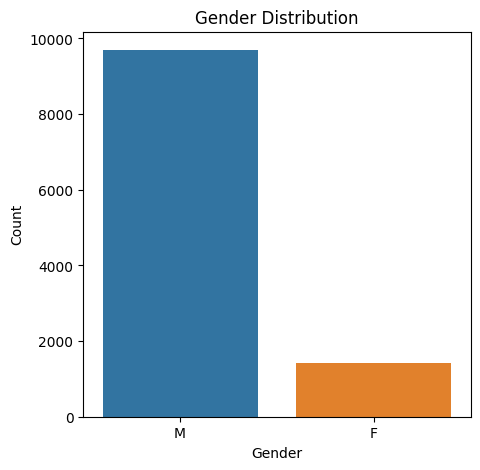

In [29]:
#Bar plot for 'gender'
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

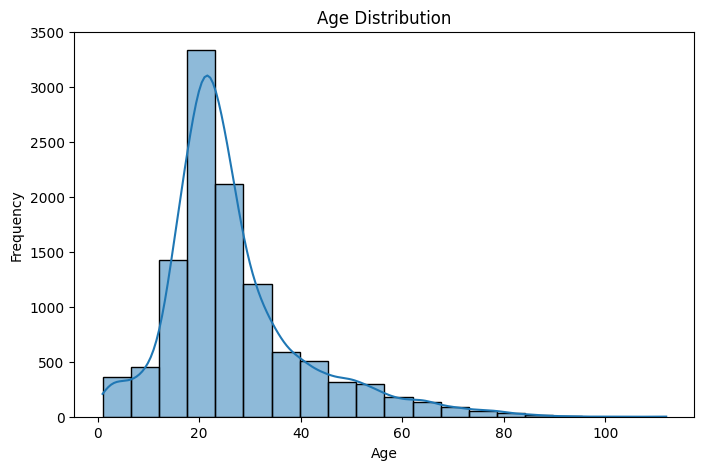

In [31]:
# Histogram for the 'age' column
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

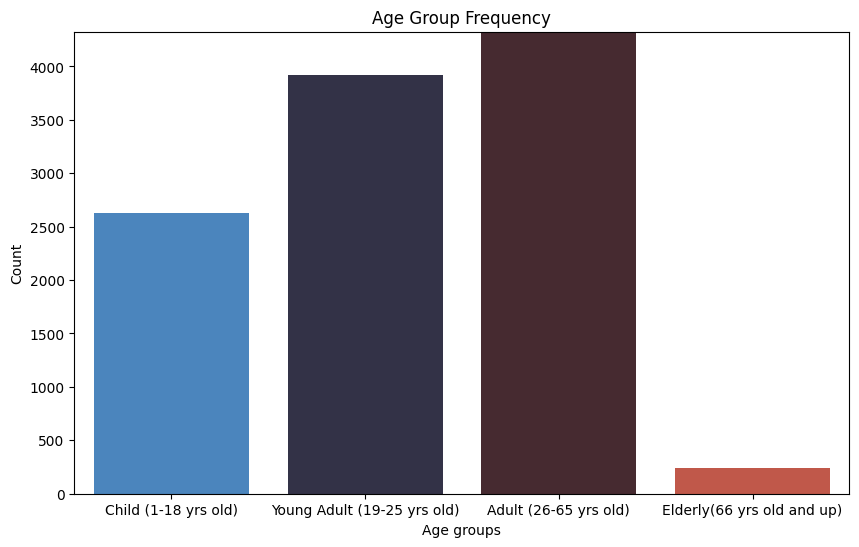

In [71]:


age_groups = ['Child (1-18 yrs old)', 'Young Adult (19-25 yrs old)', 'Adult (26-65 yrs old)', 'Elderly(66 yrs old and up)']
df['age_groups'] = pd.cut(df['age'], bins=[0, 18, 25, 65, 112], labels=age_groups)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['age_groups'], palette='icefire')
plt.title('Age Group Frequency')

ax.set_ylim(0, max(df['age_groups'].value_counts()))

plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()



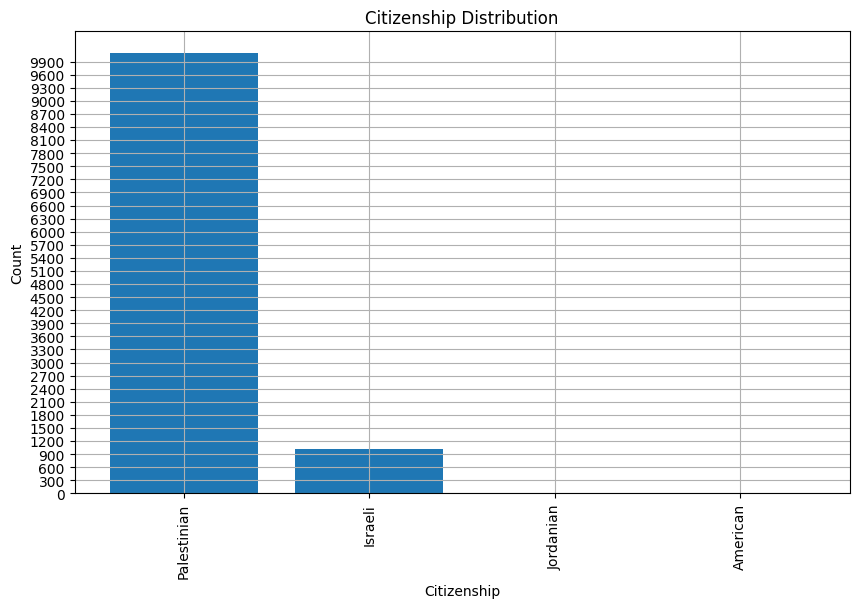

In [69]:
citizenship_count = df['citizenship'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(citizenship_count.index, citizenship_count.values)
plt.title('Citizenship Distribution')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)

# Set y-axis ticks at every 100
plt.yticks(range(0, citizenship_count.max() + 1, 300))

plt.show()


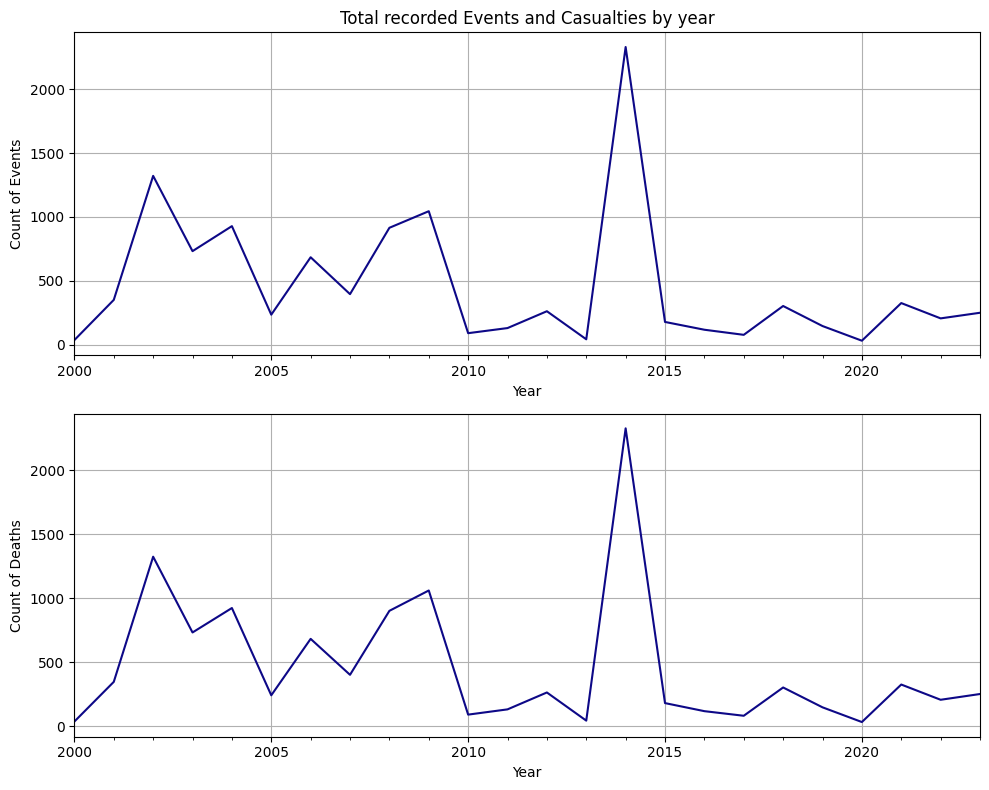

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'date_of_event' and 'date_of_death' are in string format, convert them to datetime objects
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

# Create a DataFrame with a DatetimeIndex using 'date_of_event'
df_event = df.set_index('date_of_event')

# Create a DataFrame with a DatetimeIndex using 'date_of_death'
df_death = df.set_index('date_of_death')

fig = plt.figure(figsize=(10, 8))

# First subplot using 'date_of_event'
ax1 = fig.add_subplot(211)
df_event.resample('Y')['name'].count().plot(cmap='plasma', title='Total recorded Events and Casualties by year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Events')
plt.grid()

# Second subplot using 'date_of_death'
ax2 = fig.add_subplot(212)
df_death.resample('Y')['name'].count().plot(cmap='plasma')
ax2.set_xlabel('Year')
ax2.set_ylabel('Count of Deaths')
plt.grid()

plt.tight_layout()
plt.show()
